In [42]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)
from frequency_kstest_one_sided import FrequencyKSTestOneSided

import scienceplots    

np.random.seed(42)
plt.style.use(['no-latex', 'ieee'])

In [43]:
def select_alpha_gst_obrien_fleming(n, N, alpha, rho=0.5):
    t = n / N
    return 4 - 4 * sp.stats.norm.cdf(
            sp.stats.norm.ppf(1 - alpha / 4) / t ** (rho / 2)
        )


In [44]:
def bonferroni_correction(N_peek, alpha):
    return alpha / N_peek

In [45]:
# Test false positive rate
def test_false_positive_rate(n, alpha, effect_size):
    results_bonferroni = []
    results_avi = []
    results_gst = []
    results_gst_2 = []
    results_gst_5 = []

    N_peeks = n / 5

    for i in range(1, 100):
        treated_data = np.random.normal(effect_size, 1, n)
        control_data = np.random.normal(0, 1, n)
        p_value = FrequencyKSTestOneSided.p_value(control_data, treated_data, avi=True)
        results_avi.append(p_value < alpha)
        p_value = FrequencyKSTestOneSided.p_value(control_data, treated_data)
        results_bonferroni.append(p_value < bonferroni_correction(N_peeks, alpha))
        results_gst.append(p_value < select_alpha_gst_obrien_fleming(n, n, alpha))
        results_gst_2.append(p_value < select_alpha_gst_obrien_fleming(n, n * 2, alpha))
        results_gst_5.append(p_value < select_alpha_gst_obrien_fleming(n, n * 5, alpha))

    return results_bonferroni.count(True)/ len(results_bonferroni), results_avi.count(True) / len(results_avi), results_gst.count(True) / len(results_gst), results_gst_2.count(True) / len(results_gst_2), results_gst_5.count(True) / len(results_gst_5)


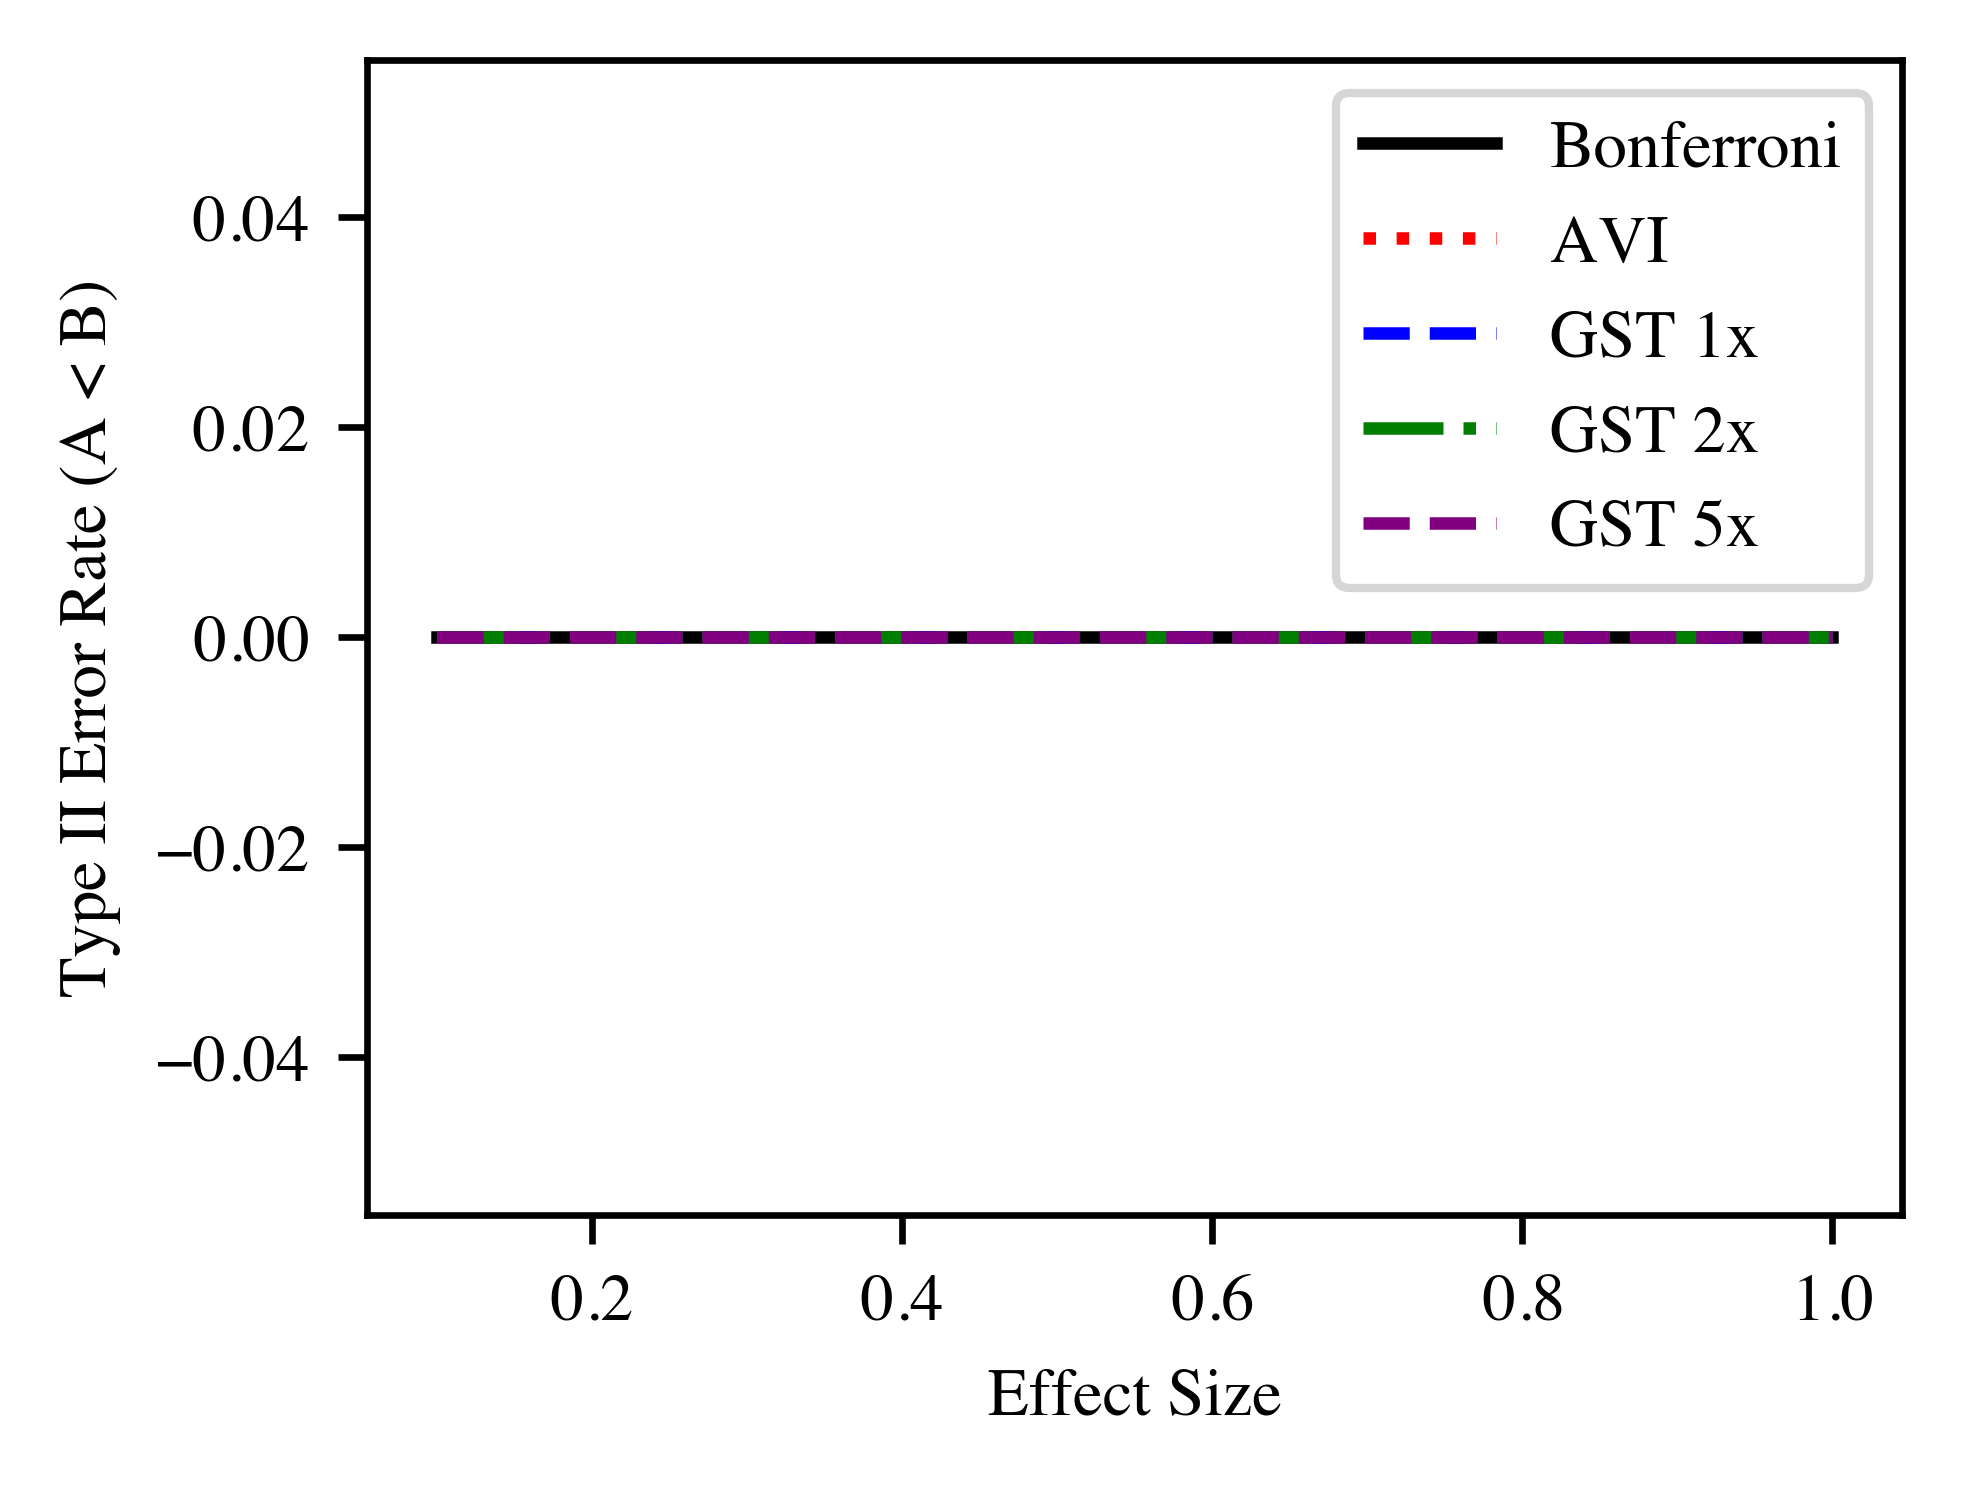

In [46]:
bonferroni = []
avi = []
gst = []
gst_2= []
gst_5 = []

effect_sizes = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]

# false positive rate 
for effect_size in effect_sizes:
    results_bonferroni, results_avi, results_gst, results_gst_2, results_gst_5  =  test_false_positive_rate(500, 0.05, effect_size)
    bonferroni.append(results_bonferroni)
    avi.append(results_avi)
    gst.append(results_gst)
    gst_2.append(results_gst_2)
    gst_5.append(results_gst_5)


plt.plot(effect_sizes, bonferroni, label="Bonferroni", linestyle='solid', color='black')
plt.plot(effect_sizes, avi, label="AVI", linestyle='dotted', color='red')
plt.plot(effect_sizes, gst, label="GST 1x", linestyle='dashed', color='blue')
plt.plot(effect_sizes, gst_2, label="GST 2x", linestyle='dashdot', color='green')
plt.plot(effect_sizes, gst_5, label="GST 5x", linestyle='--', color='purple')
plt.legend()
plt.xlabel("Effect Size")
plt.ylabel("Type II Error Rate (A < B)")

plt.show()


In [47]:
def test_falsly_unsignificant_change(n, alpha, effect_size, tau=0.1):
    results_bonferroni = []
    results_avi = []
    results_gst = []
    results_gst_2 = []
    results_gst_5 = []

    N_peeks = n / 5


    for i in range(1, 100):
        treated_data = np.random.normal(effect_size, 1, n)
        control_data = np.random.normal(0, 1, n)

        _, upper_bound = FrequencyKSTestOneSided.ci(treated_data, control_data, alpha, avi=False)
        results_avi.append(upper_bound < tau)
        _, upper_bound = FrequencyKSTestOneSided.ci(treated_data, control_data, bonferroni_correction(N_peeks, alpha))
        results_bonferroni.append(upper_bound < tau)
        _, upper_bound = FrequencyKSTestOneSided.ci(treated_data, control_data, select_alpha_gst_obrien_fleming(n, n, alpha))
        results_gst.append(upper_bound < tau)
        _, upper_bound = FrequencyKSTestOneSided.ci(treated_data, control_data, select_alpha_gst_obrien_fleming(n, n * 2, alpha))
        results_gst_2.append(upper_bound < tau)
        _, upper_bound = FrequencyKSTestOneSided.ci(treated_data, control_data, select_alpha_gst_obrien_fleming(n, n * 5, alpha))
        results_gst_5.append(upper_bound < tau)
    
    return results_bonferroni.count(False) / len(results_bonferroni), results_avi.count(False) / len(results_avi), results_gst.count(False) / len(results_gst), results_gst_2.count(False) / len(results_gst_2), results_gst_5.count(False) / len(results_gst_5)


1.0
0.08080808080808081
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


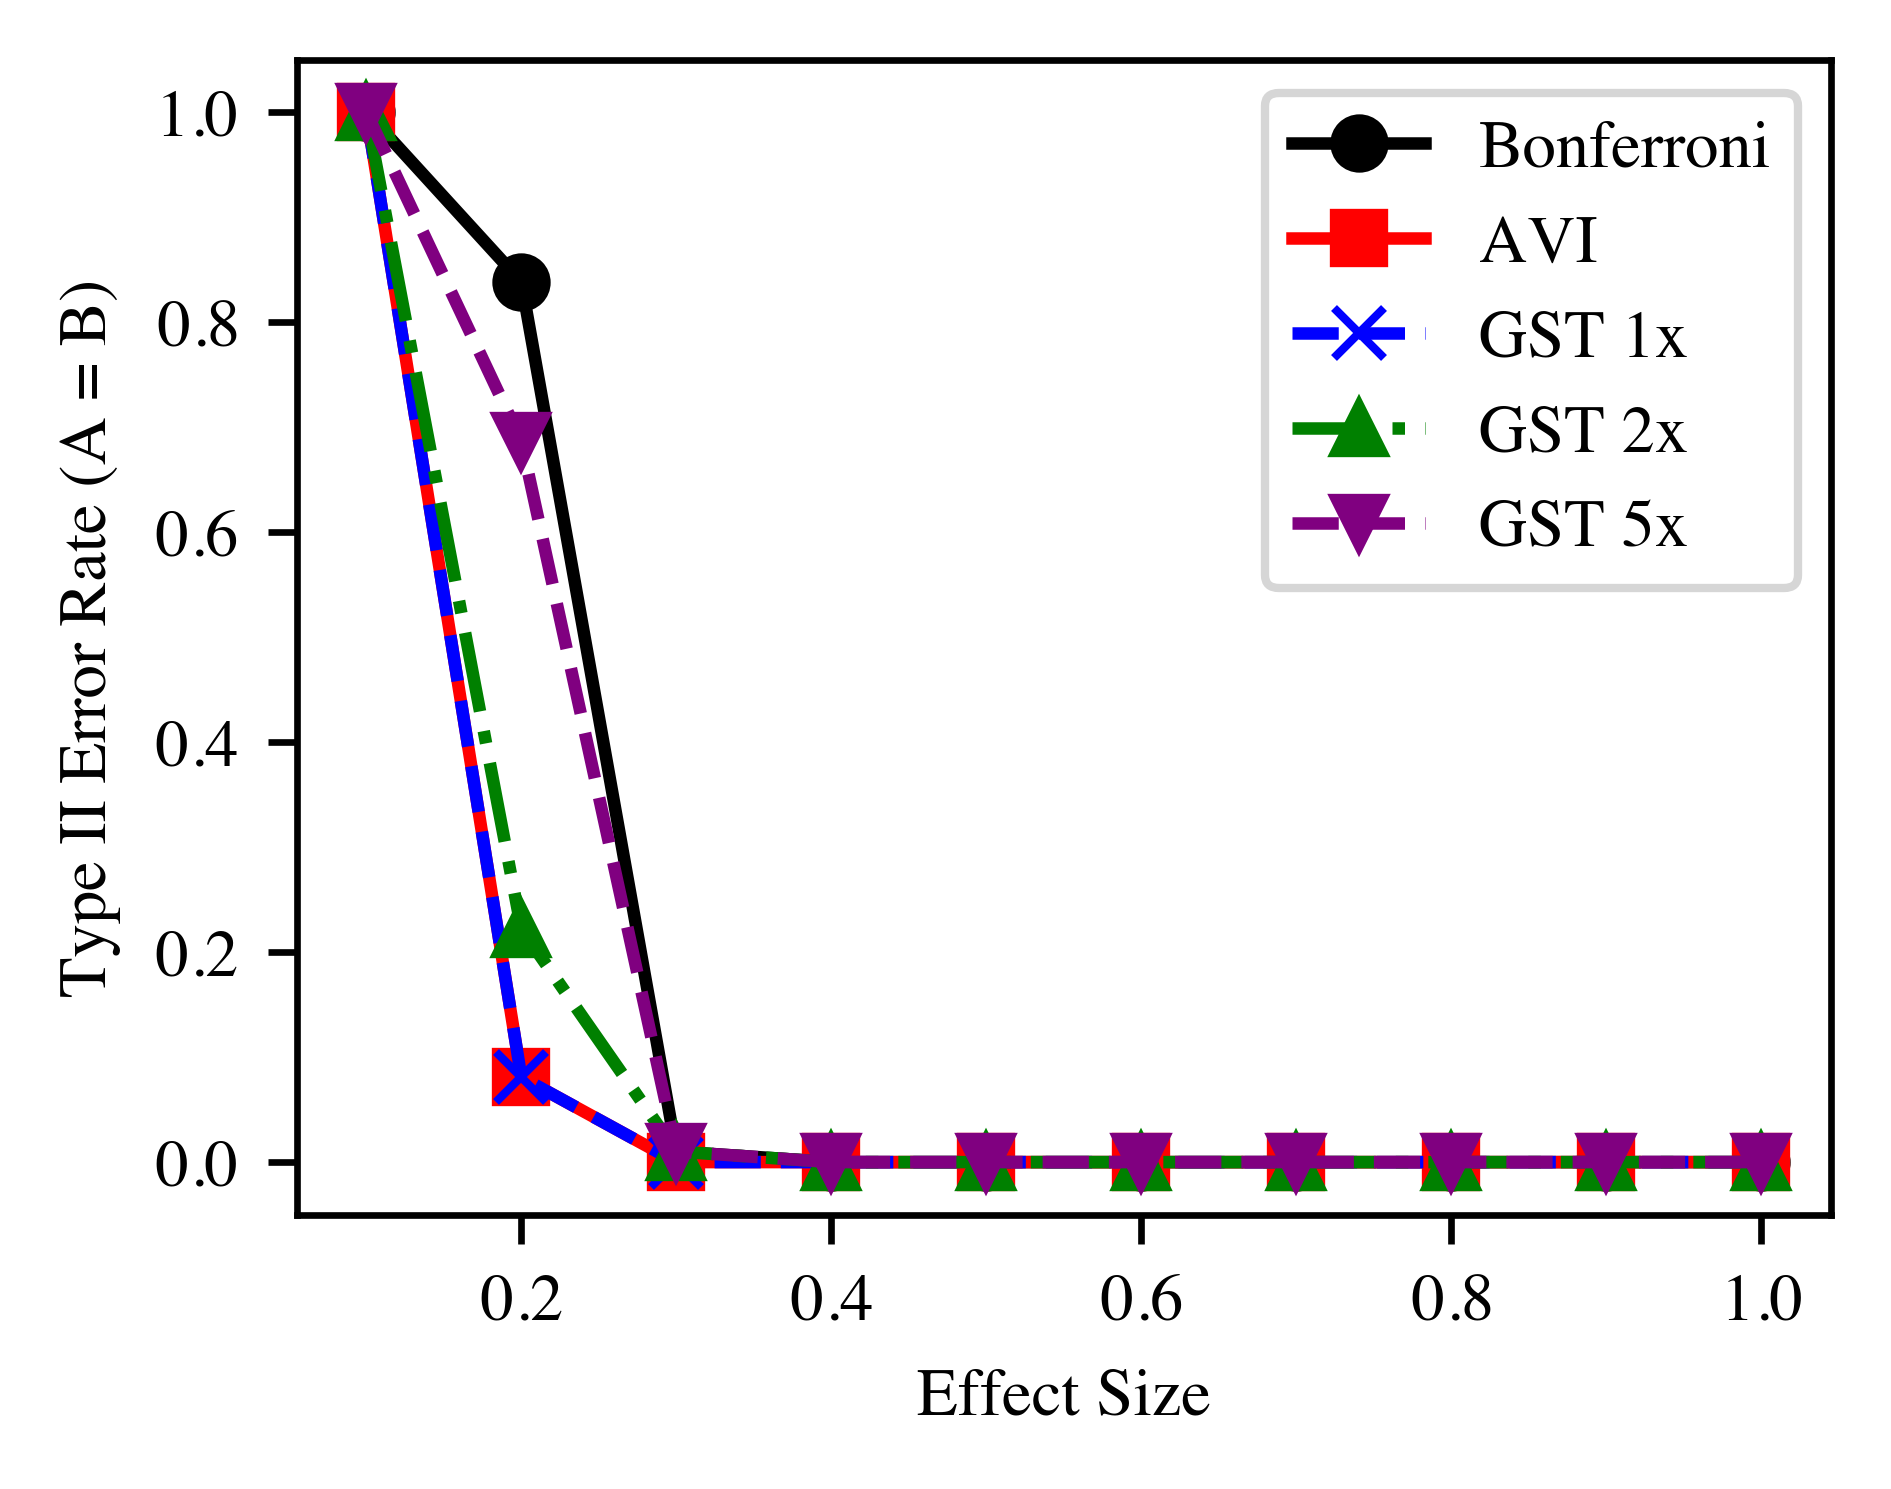

In [48]:
bonferroni = []
avi = []
gst = []
gst_2 = []
gst_5 = []

effect_sizes = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]

# false positive rate 
for effect_size in effect_sizes:
    results_bonferroni, results_avi, results_gst, results_gst_2, results_gst_5 = test_falsly_unsignificant_change(500, 0.05, 0, effect_size)
    bonferroni.append(results_bonferroni)
    print(results_avi)
    avi.append(results_avi)
    gst.append(results_gst)
    gst_2.append(results_gst_2)
    gst_5.append(results_gst_5)

# plot 
plt.plot(effect_sizes, bonferroni, label="Bonferroni", linestyle='solid', color='black', marker='o')
plt.plot(effect_sizes, avi, label="AVI", linestyle='solid', color='red', marker='s')
plt.plot(effect_sizes, gst, label="GST 1x", linestyle='dashed', color='blue', marker='x')
plt.plot(effect_sizes, gst_2, label="GST 2x", linestyle='dashdot', color='green', marker='^')
plt.plot(effect_sizes, gst_5, label="GST 5x", linestyle='--', color='purple', marker='v')
plt.legend()
plt.xlabel("Effect Size")
plt.ylabel("Type II Error Rate (A = B)")

plt.show()
